In [18]:
%load_ext autoreload 
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import model as md
import view as vw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def get_sine(t,F,A=1):
    return A*np.sin(2 * np.pi * F * t)

In [20]:
duration = 1000e-6
F_main_real=440e3

fs = F_main_real*20

F_noise_1=100e3
F_noise_2=700e3
F_noise_3=200e3

t = np.linspace(0, duration, int(duration * fs))  

U = get_sine(t,F_main_real,2)+get_sine(t,F_noise_1)+get_sine(t,F_noise_2)+get_sine(t,F_noise_3)

In [21]:
R= 150
C= 1e-12

phase_real= md.get_phase_RC_real(F_main_real,R,C)
print(phase_real)

t,I= md.RC_transfer(t,U,R,C)

0.023759998638013684


440008.81684491975


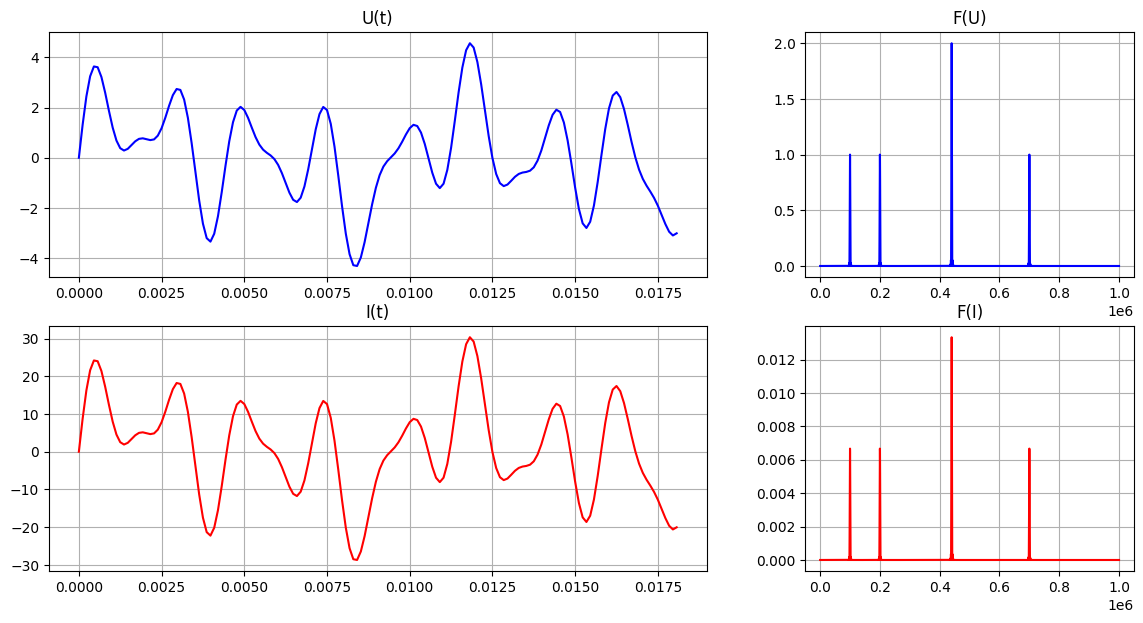

In [22]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

print(F_peak_calc)

T_counts=md.convert_to_counts(t,T)

window=T_counts*8

vw.show_I_U_2(t,I,U,0,window)

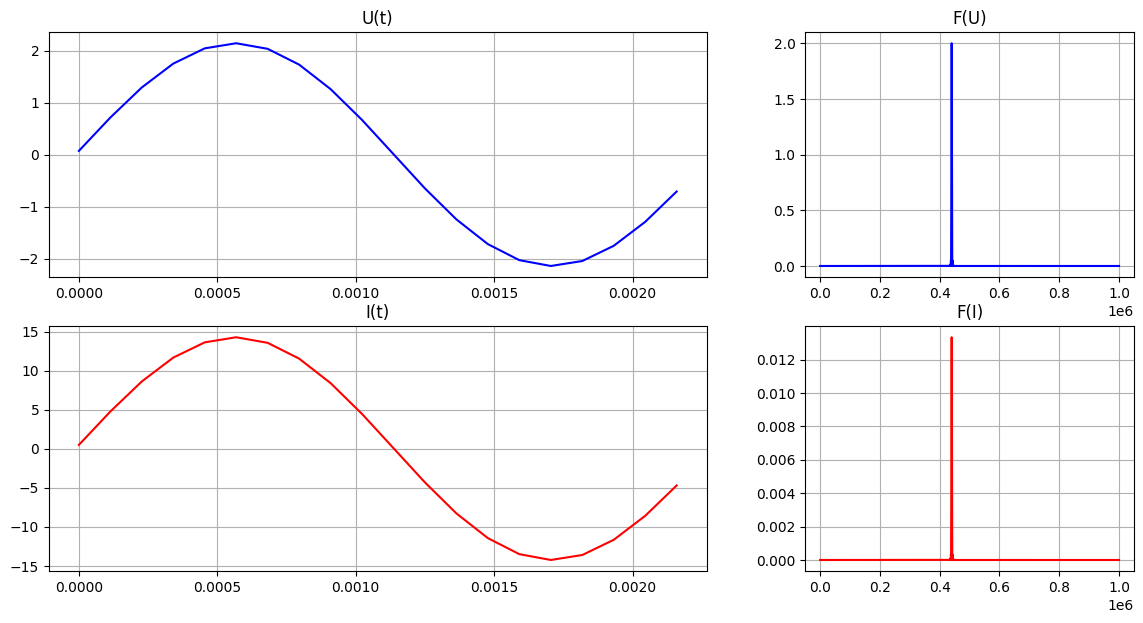

In [23]:
t_f, U_f=md.filter_butter_bandpass(t,U,F_peak_calc,100e3,5)
t_f, I_f=md.filter_butter_bandpass(t,I,F_peak_calc,100e3,5)

vw.show_I_U_2(t_f,I_f, U_f,0,T_counts)

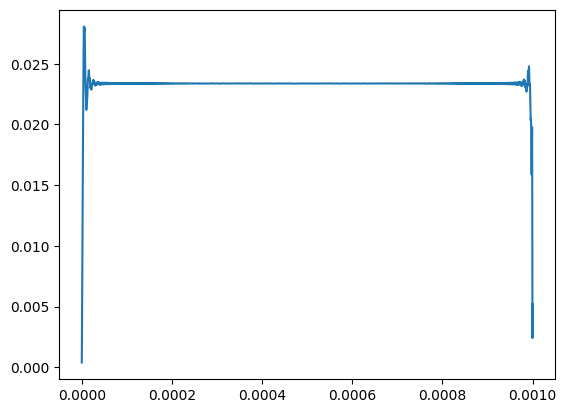

In [24]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f, U_f, I_f)

plt.plot(time_hilbert, phase_hilbert)

phase_mean=abs(np.mean(phase_hilbert))

central_index=int(len(phase_hilbert)/2)
phase_mean_hilbert=phase_hilbert[central_index]

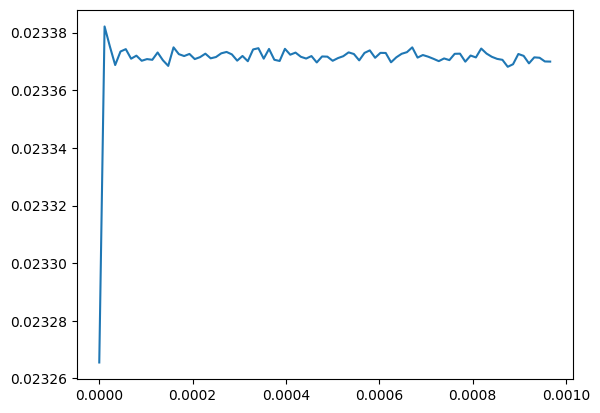

In [25]:
time_FFT, phase_FFT = md.get_phase_FFT(U_f, I_f, fs, F_peak_calc, n_periods=10, overlap=0.5)
plt.plot(time_FFT, phase_FFT)

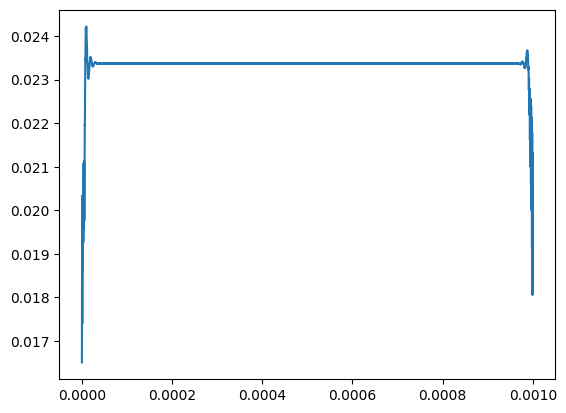

In [26]:
time_lockin, phase_lockin = md.get_phase_lockin(I_f,U_f,fs,F_peak_calc,5)
plt.plot(time_lockin,phase_lockin)

In [27]:
def mid_F_rel(sig):
    central_index=int(len(sig)/2)
    phase_central=sig[central_index]
    f_rel = F_peak_calc * np.cos(phase_central*0.0174533) / np.sin(phase_central*0.0174533)

    #phase_mean=np.mean(sig[central_index-100:central_index+100])
    #f_rel = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
    return f_rel

In [28]:
# Сравнение частоты 

f_rel_real=1/(2*pi*R*C)
f_rel_real

1061032953.945969

In [29]:
f_rel_calc_mean = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
print(f_rel_calc_mean)

1081772397.6021872


In [30]:
print(mid_F_rel(phase_hilbert))
print(mid_F_rel(phase_FFT))
print(mid_F_rel(phase_lockin))

1078633855.971185
1078685320.4185438
1078558196.2299378
